In [ ]:
# -*- coding: utf-8 -*-
"""
Created on 12-05-2019

@author: Xin Huang
"""

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
# from keras.optimizers import RMSprop

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
import numpy as np

from google.colab import drive
drive.mount('content/')
# data = np.load('Sat_data_small.npz')
# data = np.load('/content/content/My Drive/Colab Notebooks/Sat_data_small.npz')
# data = np.load('/content/content/My Drive/Colab Notebooks/kddworkshop/train7.npz')
data = np.load('/content/content/My Drive/Colab Notebooks/kddworkshop/fulldata/train10.npz')

# passive = 1
#load common data
latlon = data['latlon']
iff = data['iff']

X_v = data['viirs']
Y_v = data['label']
print ('X_v shape:');
print (X_v.shape);

X_c = data['calipso']
Y_c = data['label']
print ('X_c shape:');
print (X_c.shape);

inds_v,vals_v = np.where(Y_v>0)
Y_v = Y_v[inds_v]
X_v = X_v[inds_v]
print ('X_v')
print (X_v)

inds_c,vals_c = np.where(Y_c>0)
Y_c = Y_c[inds_c]
X_c = X_c[inds_c]
print ('X_c')
print (X_c)

# process common data
Latlon = latlon[inds_v]
Iff = iff[inds_v]

print('original X_v: ', X_v.shape)
rows = np.where((X_v[:,0] >= 0) & (X_v[:,0] <= 83) & (X_v[:,15] > 100) & (X_v[:,15] < 400) & (X_v[:,16] > 100) & (X_v[:,16] < 400) & (X_v[:,17] > 100) & (X_v[:,17] < 400) & (X_v[:,18] > 100) & (X_v[:,18] < 400) & (X_v[:,19] > 100) & (X_v[:,19] < 400) & (X_v[:,10] > 0))
print("rows:", rows)
print("rows.shape:", len(rows))

Latlon = Latlon[rows]
Iff = Iff[rows]

Y_v = Y_v[rows]
X_v = X_v[rows]

Y_c = Y_c[rows]
X_c = X_c[rows]

print('after SZA X_v: ', X_v.shape)
print('after SZA X_c: ', X_c.shape)

#concanate common data
# X_v = np.concatenate((X_v, Latlon, Iff), axis=1)
X_c = np.concatenate((X_c, Latlon, Iff), axis=1)
print (X_v.shape)
print (X_c.shape)

X_v = np.nan_to_num(X_v)
X_c = np.nan_to_num(X_c)



Drive already mounted at content/; to attempt to forcibly remount, call drive.mount("content/", force_remount=True).
X_v shape:
(2099451, 20)
X_c shape:
(2099451, 25)
X_v
[[ 97.43999481 -55.29999924   2.52999997 ... 246.61909485 246.91960144
  246.64631653]
 [ 97.43999481 -55.2899971    2.51999998 ... 247.22109985 247.5663147
  247.28843689]
 [ 97.40999603 -55.22999954   2.5        ... 248.27958679 248.7721405
  248.57876587]
 ...
 [ 94.68000031 -62.64999771   2.12999988 ... 228.96557617 228.62413025
  227.59910583]
 [ 94.68000031 -62.62999725   2.12999988 ... 229.51361084 229.17892456
  227.92941284]
 [ 94.66999817 -62.6099968    2.12999988 ... 230.20637512 230.03952026
  228.89453125]]
X_c
[[ 1.000e+00  2.000e+00  0.000e+00 ...        nan -9.999e+03        nan]
 [ 1.000e+00  2.000e+00  0.000e+00 ...        nan -9.999e+03        nan]
 [ 1.000e+00  2.000e+00  0.000e+00 ...        nan -9.999e+03        nan]
 ...
 [ 1.000e+00  1.000e+00  0.000e+00 ...        nan -9.999e+03        nan]
 [

In [ ]:
# combine data and split latter to define ground truth for MLR
# from sklearn.linear_model import LinearRegression
n1=20
n2=25
X=np.concatenate((X_v, X_c), axis=1)
Y=Y_v
print (X.shape)
print (Y_v)
x_train, x_valid, y_train, y_valid = train_test_split(X, Y,
                                                    test_size=0.3,
                                                    random_state=0,
                                                    stratify=Y)

# x_valid, x_test, y_valid, y_test = train_test_split(x_temp, y_temp,
#                                                     test_size=0.5,
#                                                     random_state=0,
#                                                     stratify=y_temp)

# feature scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
x_train=sc_X.fit_transform(x_train)
x_valid=sc_X.transform(x_valid)
# x_test=sc_X.fit_transform(x_test)

x_train_v = x_train[:, 0:20]
x_train_c = x_train[:, 20:45]
x_train_comm = x_train[:, 45:51]
x_train_src = x_train[:, 20:51]

print(x_train_v.shape)
print(x_train_c.shape)
print(x_train_comm.shape)
print(x_train_src.shape)
print(y_train.shape)

x_valid_v = x_valid[:, 0:20]
x_valid_c = x_valid[:, 20:45]
x_valid_comm = x_valid[:, 45:51]

print(x_valid_v.shape)
print(x_valid_c.shape)
print(x_valid_comm.shape)

# x_test_v = x_test[:, 0:20]
# x_test_c = x_test[:, 20:45]
# x_test_comm = x_test[:, 45:51]

# print(x_test_v.shape)
# print(x_test_c.shape)
# print(x_test_comm.shape)


(704800, 51)
[[2]
 [2]
 [2]
 ...
 [3]
 [3]
 [3]]
(493360, 20)
(493360, 25)
(493360, 6)
(493360, 31)
(493360, 1)
(211440, 20)
(211440, 25)
(211440, 6)


In [ ]:
# # run multivariate linear regression to impute the missing calipso data
# mlrs = []
# for k in range(0, 25):
#     print (k)
#     # fit linear model for each kth feature of Calipos train data
#     mlr_k = LinearRegression()
#     mlr_k.fit(x_train_v, x_train_c[:, k]) 
#     print(mlr_k.intercept_)
# #     print(mlr_k.coef_)
#     mlrs.append(mlr_k)
    

In [ ]:
# #defien the x_test_pt used for DL training
# x_test_c_p = np.zeros(shape=(25, x_test_v.shape[0]))
# print(x_test_c_p.shape)
# # predict the kth feature of the Calipso data from the Viris test data, Assume the Calipso test data is not existed. 
# for k in range(0, 25):
#     predi = mlrs[k].predict(x_test_v)
# #     print(predi)
#     x_test_c_p[k] = predi
    
# print(x_test_c_p.shape)

# x_test_c_pt = x_test_c_p.T
# print(x_test_v.shape)
# print(x_test_c_pt.shape)

# # #concanate common data
# # X_v = np.concatenate((X_v, Latlon, Iff), axis=1)
# # X_c = np.concatenate((X_c, Latlon, Iff), axis=1)
# # print (X_v.shape)
# # print (X_c.shape)

# # x_test_pt = np.concatenate((x_test_v, x_test_c_pt, x_test_comm),axis=1)
# x_test_pt = np.concatenate((x_test_c_pt, x_test_comm),axis=1)

# print(x_test_pt.shape)

In [ ]:
# define the sequential model with keras
model_reg = Sequential()
model_reg.add(Dense(256,input_shape=(x_train_v.shape[1],)))
model_reg.add(Dense(256, activation= "relu"))
model_reg.add(Dropout(0.5))
model_reg.add(Dense(256, activation= "relu"))
model_reg.add(Dropout(0.5))
model_reg.add(Dense(128, activation= "relu"))
model_reg.add(Dropout(0.5))
model_reg.add(Dense(64, activation= "relu"))
model_reg.add(Dropout(0.5))
model_reg.add(Dense(x_train_c.shape[1], activation= "linear"))
model_reg.summary()
model_reg.compile(loss= "mse" , optimizer='adam', metrics=['mse','mae'])
model_reg.fit(x_train_v, x_train_c, validation_data=(x_valid_v, x_valid_c), epochs=150, batch_size=128, verbose=1)

#0.001
#0.00001
#batch size 
#last layer: relu, softmax


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 256)               5376      
_________________________________________________________________
dense_8 (Dense)              (None, 256)               65792     
_________________________________________________________________
dropout_5 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 256)               65792     
_________________________________________________________________
dropout_6 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_7 (Dropout)          (None, 128)              

In [ ]:
x_train_c_pt = model_reg.predict(x_train_v)
# x_test_c_pt = model_reg.predict(x_test_v)
x_valid_c_pt = model_reg.predict(x_valid_v)
print(x_train_c_pt.shape)
# print(x_test_c_pt.shape)
print(x_valid_c_pt.shape)

# DLR imputed target domain
x_train_pt = np.concatenate((x_train_c_pt, x_train_comm),axis=1)

print(x_train_pt.shape)

# x_test_pt = np.concatenate((x_test_c_pt, x_test_comm),axis=1)

# print(x_test_pt.shape)

x_valid_pt = np.concatenate((x_valid_c_pt, x_valid_comm),axis=1)

print(x_valid_pt.shape)

(493360, 25)
(211440, 25)
(493360, 31)
(211440, 31)


In [ ]:
# use Logistic regression model
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0, solver='lbfgs',
                         multi_class='multinomial').fit(x_train_pt, y_train)
y_pred = clf.predict(x_valid_pt)
print (clf.score(x_valid_pt, y_valid))

num_classes1 = 6
y_lr_gd = keras.utils.to_categorical(y_valid-1, num_classes1)
y_lr_pred = keras.utils.to_categorical(y_pred-1, num_classes1)

from sklearn.metrics import roc_auc_score
roc_auc_score(y_lr_gd, y_lr_pred)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7056280741581537


0.7953723707855836

In [ ]:
# # use deep learning model
# num_classes = 6

# print ('y_train')
# print (y_train)
# # convert class vectors to binary class matrices
# y_train = keras.utils.to_categorical(y_train-1, num_classes)
# y_valid = keras.utils.to_categorical(y_valid-1, num_classes)
# y_test = keras.utils.to_categorical(y_test-1, num_classes)

# print ('y_train converted')
# print (y_train)

# batch_size = 1024
# epochs = 50

# model = Sequential()
# model.add(Dense(128, activation='relu', input_shape=(x_train_pt.shape[1],)))
# model.add(Dropout(0.4))
# model.add(Dense(512, activation='relu'))
# model.add(Dropout(0.4))
# model.add(Dense(256, activation='relu'))
# model.add(Dropout(0.4))
# model.add(Dense(128, activation='relu'))
# model.add(Dropout(0.4))
# model.add(Dense(64, activation='relu'))
# model.add(Dropout(0.4))
# model.add(Dense(num_classes, activation='softmax'))

# model.summary()

# model.compile(loss='categorical_crossentropy',
#               optimizer=RMSprop(lr=0.001),
#               metrics=['accuracy'])

# history = model.fit(x_train_pt, y_train,
#                     batch_size=batch_size,
#                     epochs=epochs,
#                     verbose=1,
#                     validation_data=(x_valid_pt, y_valid))
# score = model.evaluate(x_test_pt, y_test, verbose=0)
# print('Test loss:', score[0])
# print('Test accuracy:', score[1])
# print('Test score:', score)

In [ ]:

# score = model.evaluate(x_test_pt, y_test, verbose=0)
# print('Test loss:', score[0])
# print('Test accuracy:', score[1])
# print('Test score:', score)
# predict_result = model.predict_proba(x_test_pt);
# print (predict_result)
# from sklearn.metrics import roc_auc_score
# roc_auc_score(y_test, predict_result)

In [ ]:
data_test = np.load('/content/content/My Drive/Colab Notebooks/kddworkshop/fulldata/test_138_day.npz')

passive =1

#load common data
latlon_test = data_test['latlon']
iff_test = data_test['iff']

# if passive ==1:
x_t_test = data_test['viirs']
y_t_test = data_test['label']
# else:
x_s_test = data_test['calipso']
y_s_test = data_test['label']
    
inds_test,vals_test = np.where(y_t_test>0)

# process common data
Latlon_test = latlon_test[inds_test]
Iff_test = iff_test[inds_test]

Y_t_test = y_t_test[inds_test]
X_t_test = x_t_test[inds_test]

Y_s_test = y_s_test[inds_test]
X_s_test = x_s_test[inds_test]

# 0 =< SZA <= 83
print('original X_t_test: ', X_t_test.shape)
rows_test = np.where((X_t_test[:,0] >= 0) & (X_t_test[:,0] <= 83) & (X_t_test[:,15] > 100) & (X_t_test[:,15] < 400) & (X_t_test[:,16] > 100) & (X_t_test[:,16] < 400) & (X_t_test[:,17] > 100) & (X_t_test[:,17] < 400) & (X_t_test[:,18] > 100) & (X_t_test[:,18] < 400) & (X_t_test[:,19] > 100) & (X_t_test[:,19] < 400) & (X_t_test[:,10] > 0))
print("rows_test:", rows_test)
print("rows_test.shape:", len(rows_test))

Latlon_test = Latlon_test[rows_test]
Iff_test = Iff_test[rows_test]

Y_t_test = Y_t_test[rows_test]
X_t_test = X_t_test[rows_test]

Y_s_test = Y_s_test[rows_test]
X_s_test = X_s_test[rows_test]

X_s_test = np.nan_to_num(X_s_test)
X_t_test = np.nan_to_num(X_t_test)

print('after SZA X_t_test: ', X_t_test.shape)
print('after SZA X_s_test: ', X_s_test.shape)

# pca = decomposition.PCA(n_components=20)
# pca.fit(X_s_test)
# X_s_test = pca.transform(X_s_test)
# print (X_s_test.shape)

#concanate common data
# X_t_test = np.concatenate((X_t_test, Latlon_test, Iff_test), axis=1)
X_s_test = np.concatenate((X_s_test, Latlon_test, Iff_test), axis=1)

print (X_s_test.shape)
print (X_t_test.shape)

X_test=np.concatenate((X_t_test, X_s_test), axis=1)

# scaler_t = StandardScaler()
# scaler_t.fit(X_t_test)
# X_t_test = scaler_t.transform(X_t_test)

# scaler_s = StandardScaler()
# scaler_s.fit(X_s_test)
# X_s_test= scaler_s.transform(X_s_test)

x_test2=sc_X.transform(X_test)

# x_train_v = x_train[:, 0:20]
# x_train_c = x_train[:, 20:45]
# x_train_comm = x_train[:, 45:51]
# print(x_train_v.shape)
# print(x_train_c.shape)
# print(x_train_comm.shape)

# x_valid_v = x_valid[:, 0:20]
# x_valid_c = x_valid[:, 20:45]
# x_valid_comm = x_valid[:, 45:51]

# print(x_valid_v.shape)
# print(x_valid_c.shape)
# print(x_valid_comm.shape)

X_t_test = x_test2[:, 0:20]
x_test_c2 = x_test2[:, 20:45]
x_test_comm2 = x_test2[:, 45:51]


# DLR imputed target domain
x_test_t_pt = model_reg.predict(X_t_test)
print(x_test_t_pt.shape)

x_test_pt_test = np.concatenate((x_test_t_pt, x_test_comm2),axis=1)
print(x_test_pt_test.shape)


original X_t_test:  (144703, 20)
rows_test: (array([  1502,   1503,   1504, ..., 144700, 144701, 144702]),)
rows_test.shape: 1
after SZA X_t_test:  (60487, 20)
after SZA X_s_test:  (60487, 25)
(60487, 31)
(60487, 20)
(60487, 25)
(60487, 31)


In [ ]:
# score = model.evaluate(x_test_pt_test, Y_t_test, verbose=0)
# print('Test loss:', score[0])
# print('Test accuracy:', score[1])
# print('Test score:', score)
# predict_result = model.predict_proba(x_test_pt);
# print (predict_result)
# from sklearn.metrics import roc_auc_score
# roc_auc_score(y_test, predict_result)

self.X before fit_transform
[[ 0.21177404 -0.1636653   1.35447067 ...  1.65943487 -1.99399076
  -0.51567848]
 [-1.24009487 -0.95303212 -0.81044312 ... -0.61386271  0.4848845
   1.34519875]
 [-1.24009487 -0.95303212 -0.81044312 ...  1.65002284 -1.16769901
  -0.51567848]
 ...
 [-1.24009487 -0.95303212 -0.81044312 ...  1.66011902 -0.96112607
  -0.51567848]
 [-1.24009487 -0.95303212 -0.81044312 ...  1.64380342  0.27831156
  -0.51567848]
 [ 0.21177404 -0.1636653  -0.81044312 ...  1.65868855 -0.13483431
   4.22955846]]
self.y before fit_transform
[[2]
 [1]
 [1]
 ...
 [5]
 [1]
 [3]]
self.X before fit_transform
[[ 0.21177405 -0.1636653   1.3544706  ...  1.6594349  -1.9939908
  -0.51567847]
 [-1.2400949  -0.95303214 -0.8104431  ... -0.6138627   0.4848845
   1.3451988 ]
 [-1.2400949  -0.95303214 -0.8104431  ...  1.6500229  -1.167699
  -0.51567847]
 ...
 [-1.2400949  -0.95303214 -0.8104431  ...  1.660119   -0.9611261
  -0.51567847]
 [-1.2400949  -0.95303214 -0.8104431  ...  1.6438035   0.27831155

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


self.X before fit_transform
[[ 0.     0.     0.    ... -9.999 17.     0.   ]
 [ 0.     0.     0.    ... -9.999 17.     0.   ]
 [ 0.     0.     0.    ... -9.999 17.     0.   ]
 ...
 [ 1.     2.     1.    ... -9.999 17.     0.   ]
 [ 1.     2.     1.    ... -9.999 17.     0.   ]
 [ 1.     2.     1.    ... -9.999 17.     0.   ]]
self.y after fit_transform
[0 0 0 ... 5 5 5]
self.X before fit_transform
[[ 0.35823467  0.12620217  0.9982332  ...  1.65943487 -1.99399076
  -0.51567848]
 [-0.96388888 -0.69021094 -0.65073675 ... -0.61386271  0.4848845
   1.34519875]
 [-0.96073598 -0.68975067 -0.6470691  ...  1.65002284 -1.16769901
  -0.51567848]
 ...
 [-0.88279784 -0.63213605 -0.57883036 ...  1.66011902 -0.96112607
  -0.51567848]
 [-1.02602828 -0.76340628 -0.64171576 ...  1.64380342  0.27831156
  -0.51567848]
 [ 0.38450146  0.1448171  -0.65297019 ...  1.65868855 -0.13483431
   4.22955846]]
self.y before fit_transform
[[2]
 [1]
 [1]
 ...
 [5]
 [1]
 [3]]
self.X before fit_transform
[[ 0.35823467  0

/usr/local/lib/python3.6/dist-packages/torch/tensor.py:365: UserWarning: non-inplace resize is deprecated
  warnings.warn("non-inplace resize is deprecated")


Train Epoch:  0 [241/241]	Lambda: 0.0000, Class: 0.534969, CORAL: 0.008578, Total_Loss: 0.534969
Train ith Epoch 0 result:
train_acc: 0.832
train_tgt_acc: 0.644
test_acc: 0.622
epoch:   1 loss: 0.9100
train_steps: 241
Train Epoch:  1 [241/241]	Lambda: 0.0000, Class: 0.307672, CORAL: 0.016956, Total_Loss: 0.307672
Train ith Epoch 1 result:
train_acc: 0.910
train_tgt_acc: 0.665
test_acc: 0.640
epoch:   2 loss: 0.4177
train_steps: 241
Train Epoch:  2 [241/241]	Lambda: 0.0000, Class: 0.191309, CORAL: 0.039971, Total_Loss: 0.191309
Train ith Epoch 2 result:
train_acc: 0.939
train_tgt_acc: 0.673
test_acc: 0.646
epoch:   3 loss: 0.2520
train_steps: 241
Train Epoch:  3 [241/241]	Lambda: 0.0000, Class: 0.153182, CORAL: 0.036531, Total_Loss: 0.153182
Train ith Epoch 3 result:
train_acc: 0.956
train_tgt_acc: 0.677
test_acc: 0.651
epoch:   4 loss: 0.1728
train_steps: 241
Train Epoch:  4 [241/241]	Lambda: 0.0000, Class: 0.115752, CORAL: 0.085738, Total_Loss: 0.115753
Train ith Epoch 4 result:
train

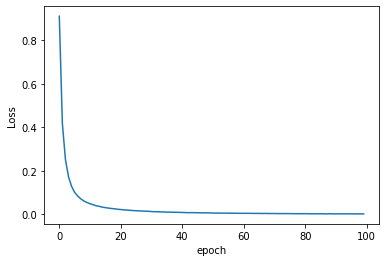

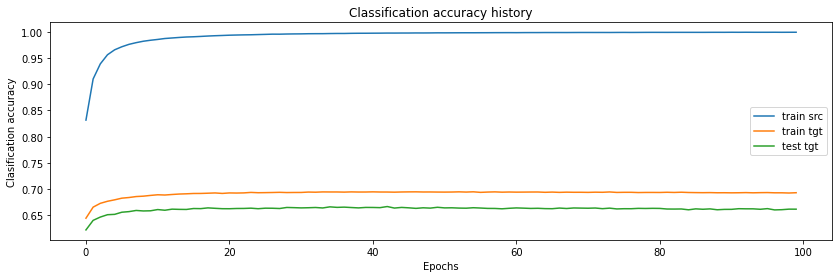

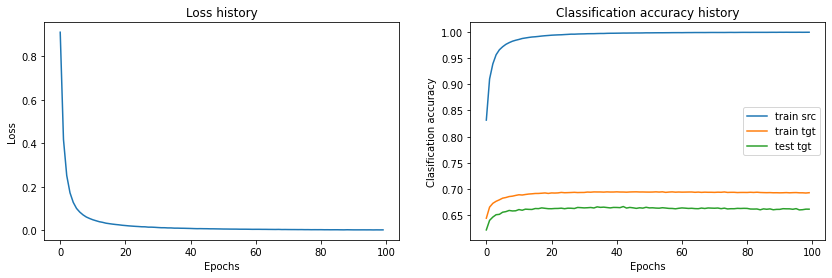

In [ ]:
# run the Correlation based DA
# pytorch mlp for multiclass classification
from numpy import vstack
from numpy import argmax
from pandas import read_csv
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from torch import Tensor
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torch.utils.data import random_split
from torch.nn import Linear
from torch.nn import ReLU
from torch.nn import Softmax
from torch.nn import Module
from torch.nn import Dropout
from torch.nn import BatchNorm1d
from torch.optim import SGD,RMSprop,Adam
from torch.nn import CrossEntropyLoss
from torch.nn.init import kaiming_uniform_
from torch.nn.init import xavier_uniform_
import torch

n_epochs = 100
lambda_ = 0.00001
NUM = 31
# DIFFERECE_COL = 5
BATCH_SIZE = 2048

# dataset definition
class CSVDataset(Dataset):
    # load the dataset
    def __init__(self, X1, Y1):
        # load the csv file as a dataframe
        self.X=X1
        self.y=Y1
        print("self.X before fit_transform")
        print(self.X)
        print("self.y before fit_transform")
        print(self.y)
        self.X = self.X.astype('float32')
        # label encode target and ensure the values are floats
        self.y = LabelEncoder().fit_transform(self.y)
        print("self.X before fit_transform")
        print(self.X)
        print("self.y after fit_transform")
        print(self.y)

    # number of rows in the dataset
    def __len__(self):
        return len(self.X)

    # get a row at an index
    def __getitem__(self, idx):
        return [self.X[idx], self.y[idx]]

    # get indexes for train and test rows
    def get_splits(self, n_test=0.33):
        # determine sizes
        test_size = round(n_test * len(self.X))
        train_size = len(self.X) - test_size
        # calculate the split
        return random_split(self, [train_size, test_size])

def CORAL(src,tgt):
    d = src.size(1)
    src_c = coral(src)
    tgt_c = coral(tgt)

    loss = torch.sum(torch.mul((src_c-tgt_c),(src_c-tgt_c)))
    loss = loss/(4*d*d)
    return loss

def LOG_CORAL(src,tgt):
    d = src.size(1)
    src_c = coral(src)
    tgt_c = coral(tgt)
    src_vals, src_vecs = torch.symeig(src_c,eigenvectors = True)
    tgt_vals, tgt_vecs = torch.symeig(tgt_c,eigenvectors = True)
    src_cc = torch.mm(src_vecs,torch.mm(torch.diag(torch.log(src_vals)),src_vecs.t()))
    tgt_cc = torch.mm(tgt_vecs,torch.mm(torch.diag(torch.log(tgt_vals)),tgt_vecs.t()))
    loss = torch.sum(torch.mul((src_cc - tgt_cc), (src_cc - tgt_cc)))
    loss = loss / (4 * d * d)
    return loss


def coral(data):
    n = data.size(0)
    id_row = torch.ones(n).resize(1,n)
    if torch.cuda.is_available():
        id_row = id_row.cuda()
    sum_column = torch.mm(id_row,data)
    mean_column = torch.div(sum_column,n)
    mean_mean = torch.mm(mean_column.t(),mean_column)
    d_d = torch.mm(data.t(),data)
    coral_result = torch.add(d_d,(-1*mean_mean))*1.0/(n-1)
    return coral_result

class Deep_coral(Module):
    def __init__(self,num_classes = 6):
        super(Deep_coral,self).__init__()
        self.feature = MLP(n_inputs=NUM)
        self.fc = Linear(64,num_classes)
        xavier_uniform_(self.fc.weight)
        #  initial layer
        # self.init_layer = Linear(NUM+5, NUM)
        # xavier_uniform_(self.init_layer.weight)
        # self.act3 = Softmax(dim=1)
        # self.fc.weight.data.normal_(0,0.005)# initialization

    def forward(self,src,tgt):
        src = self.feature(src)
        src = self.fc(src)
        # output layer
        # src = self.act3(src)
        # tgt = self.init_layer(tgt)
        tgt = self.feature(tgt)
        tgt = self.fc(tgt)
        # tgt = self.act3(tgt)
        return src,tgt

# model definition
class MLP(Module):
    # define model elements
    def __init__(self, n_inputs=NUM):
        super(MLP, self).__init__()
        # # input to very beginning hidden layer
        self.hidden = Linear(n_inputs, 128)
        kaiming_uniform_(self.hidden.weight, nonlinearity='relu')
        self.act = ReLU()
        # input to beginning hidden layer
        self.hidden0 = Linear(128, 256)
        kaiming_uniform_(self.hidden0.weight, nonlinearity='relu')
        self.act0 = ReLU()
        # input to first hidden layer
        self.hidden1 = Linear(256, 128)
        kaiming_uniform_(self.hidden1.weight, nonlinearity='relu')
        self.act1 = ReLU()
        # second hidden layer
        self.hidden2 = Linear(128, 64)
        kaiming_uniform_(self.hidden2.weight, nonlinearity='relu')
        self.act2 = ReLU()
        # # third hidden layer and output
        # self.hidden3 = Linear(64, 6)
        # xavier_uniform_(self.hidden3.weight)
        # self.act3 = Softmax(dim=1)
        self.dropout = Dropout(p=0.5)
        self.batchnorm = BatchNorm1d(128)
        self.batchnorm0 = BatchNorm1d(256)
        self.batchnorm1 = BatchNorm1d(128)
        self.batchnorm2 = BatchNorm1d(64)

    # forward propagate input
    def forward(self, X):
        # input to very first hidden layer
        X = self.hidden(X)
        X = self.batchnorm(X)
        X = self.act(X)
        X = self.dropout(X)
        # input to first hidden layer
        X = self.hidden0(X)
        X = self.batchnorm0(X)
        X = self.act0(X)
        X = self.dropout(X)
        # input to second hidden layer
        X = self.hidden1(X)
        X = self.batchnorm1(X)
        X = self.act1(X)
        X = self.dropout(X)
        # third hidden layer
        X = self.hidden2(X)
        X = self.batchnorm2(X)
        X = self.act2(X)
        # X = self.dropout(X)
        # # output layer
        # X = self.hidden3(X)
        # X = self.act3(X)
        return X

# # prepare the dataset - random split within a dataset
# def prepare_data(X2, Y2):
#     # load the dataset
#     dataset = CSVDataset(X2, Y2)
#     # calculate split
#     train, test = dataset.get_splits()
#     # prepare data loaders
#     train_dl = DataLoader(train, batch_size=512, shuffle=True)
#     test_dl = DataLoader(test, batch_size=512, shuffle=False)
#     return train_dl, test_dl

# prepare the dataset - random split within a dataset
def prepare_data(X2_train, Y2_train, X2_test, Y2_test):
    # load the train dataset
    train = CSVDataset(X2_train, Y2_train)
    # load the test dataset
    test = CSVDataset(X2_test, Y2_test)
    # prepare data loaders
    train_dl = DataLoader(train, batch_size=BATCH_SIZE, shuffle=True)
    test_dl = DataLoader(test, batch_size=BATCH_SIZE, shuffle=True)
    return train_dl, test_dl

aggre_losses = []
aggre_train_acc = []
aggre_test_acc = []
aggre_train_tgt_acc = []

# train the model
def train_model(train_src, train_tgt, model):
    # define the optimization
    criterion = CrossEntropyLoss()
    # optimizer = SGD(model.parameters(), lr=0.05, momentum=0.9)
    optimizer = RMSprop(model.parameters(), lr=0.0001)

    # enumerate epochs
    j = 0
    for epoch in range(n_epochs):
        j += 1
        # enumerate mini batches of src domain and target domain
        train_steps = min(len(train_src), len(train_tgt))
        print("train_steps:", train_steps)
        iter_src = iter(train_src)
        iter_tgt = iter(train_tgt)

        epoch_loss = 0
        for i in range(train_steps):
            # inputs, targets = train_data.next()
            # load the src and target training data
            src_data, src_label = iter_src.next()
            tgt_data, tgt_label = iter_tgt.next()
            # clear the gradients
            optimizer.zero_grad()
            # compute the model output
            # yhat = model(inputs)
            src_out, tgt_out = model(src_data, tgt_data)

            # calculate loss
            # loss = criterion(yhat, targets)
            # epoch_loss = loss
            loss_classifier = criterion(src_out, src_label)
            loss_coral = CORAL(src_out, tgt_out)
            sum_loss = lambda_ * loss_coral + loss_classifier
            epoch_loss += sum_loss

            # credit assignment
            sum_loss.backward()
            # update model weights
            optimizer.step()

        print('Train Epoch: {:2d} [{:2d}/{:2d}]\t'
              'Lambda: {:.4f}, Class: {:.6f}, CORAL: {:.6f}, Total_Loss: {:.6f}'.format(
            epoch,
            i + 1,
            train_steps,
            lambda_,
            loss_classifier.item(),
            loss_coral.item(),
            sum_loss.item()
        ))
        print('Train ith Epoch %d result:' % epoch)
        # calculate train src accuracy
        train_acc = evaluate_model(train_src, model)
        aggre_train_acc.append(train_acc)
        print('train_acc: %.3f' % train_acc)

        # calculate train tgt accuracy
        train_tgt_acc = evaluate_model(train_tgt, model)
        aggre_train_tgt_acc.append(train_tgt_acc)
        print('train_tgt_acc: %.3f' % train_tgt_acc)

        # calculate validate accuracy
        test_acc = evaluate_model(test_tgt, model)
        aggre_test_acc.append(test_acc)
        print('test_acc: %.3f' % test_acc)

        epoch_loss = epoch_loss / train_steps
        aggre_losses.append(epoch_loss)
        print(f'epoch: {j:3} loss: {epoch_loss.item():6.4f}')

# evaluate the model
def evaluate_model(test_dl, model):
    predictions, actuals = list(), list()
    test_steps = len(test_dl)
    iter_test = iter(test_dl)
    # for i, (inputs, targets) in enumerate(test_dl):
    for i in range(test_steps):
        # evaluate the model on the test set
        tgt_data, targets = iter_test.next()
        # temp = torch.zeros((tgt_data.shape[0], DIFFERECE_COL))
        # tmp_data = torch.cat((tgt_data, temp), 1)
        with torch.no_grad():
          yhat, _ = model(tgt_data, tgt_data)
        # retrieve numpy array
        yhat = yhat.detach().numpy()
        actual = targets.numpy()
        # convert to class labels
        yhat = argmax(yhat, axis=1)
        # reshape for stacking
        actual = actual.reshape((len(actual), 1))
        yhat = yhat.reshape((len(yhat), 1))
        # store
        predictions.append(yhat)
        actuals.append(actual)
    predictions, actuals = vstack(predictions), vstack(actuals)
    # calculate accuracy
    acc = accuracy_score(actuals, predictions)
    return acc

# make a class prediction for one row of data
def predict(row, model):
    # convert row to data
    row = Tensor([row])
    # make prediction
    yhat = model(row)
    # retrieve numpy array
    yhat = yhat.detach().numpy()
    return yhat

X_s = x_train_src
Y_s = y_train

X_t = x_train_pt
Y_t = Y_s

X_s_test = X_s_test
Y_s_test = Y_s_test
X_t_test = x_test_pt_test
Y_t_test = Y_s_test


# convert class vectors to binary class matrices
# y_valid = keras.utils.to_categorical(y_valid-1, num_classes)
# y_test = keras.utils.to_categorical(y_test-1, num_classes)

# prepare the data
train_src, test_src = prepare_data(X_s, Y_s, X_s_test, Y_s_test)
train_tgt, test_tgt = prepare_data(X_t, Y_t, X_t_test, Y_t_test)

# print("train_dl")
# print(train_dl)
# print(len(train_dl.dataset), len(test_dl.dataset))
# define the network
# model = MLP(20)
model = Deep_coral(num_classes=6)
# train the model
train_model(train_src, train_tgt, model)
# train_model(train_tgt, train_src, model)

# evaluate the model
# acc = evaluate_model(test_tgt, model)
acc = evaluate_model(test_tgt, model)

print('Accuracy: %.3f' % acc)
# make a single prediction
# row = [5.1,3.5,1.4,0.2]
# yhat = predict(row, model)
# print('Predicted: %s (class=%d)' % (yhat, argmax(yhat)))

#plot the loss
plt.figure()
plt.plot(range(n_epochs), aggre_losses)
plt.ylabel('Loss')
plt.xlabel('epoch');

#plot the train accuracy
plt.figure()
plt.plot(range(n_epochs), aggre_train_acc, '-', label='train src')
plt.plot(range(n_epochs), aggre_train_tgt_acc, '-', label='train tgt')
plt.plot(range(n_epochs), aggre_test_acc, '-', label='test tgt')
plt.title('Classification accuracy history')
plt.xlabel('Epochs')
plt.ylabel('Clasification accuracy')
plt.legend()
plt.gcf().set_size_inches(14, 4)


#plot the combined
plt.figure()
plt.subplot(1, 2, 1)
plt.plot(range(n_epochs), aggre_losses, '-')
plt.title('Loss history')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.subplot(1, 2, 2)
plt.plot(range(n_epochs), aggre_train_acc, '-', label='train src')
plt.plot(range(n_epochs), aggre_train_tgt_acc, '-', label='train tgt')
plt.plot(range(n_epochs), aggre_test_acc, '-', label='test tgt')
plt.title('Classification accuracy history')
plt.xlabel('Epochs')
plt.ylabel('Clasification accuracy')
plt.legend()

plt.gcf().set_size_inches(14, 4)
plt.show()

In [ ]:
data_test = np.load('/content/content/My Drive/Colab Notebooks/kddworkshop/fulldata/test_138_day.npz')

passive =1

#load common data
latlon_test = data_test['latlon']
iff_test = data_test['iff']

# if passive ==1:
x_t_test = data_test['viirs']
y_t_test = data_test['label']
# else:
x_s_test = data_test['calipso']
y_s_test = data_test['label']
    
inds_test,vals_test = np.where(y_t_test>0)

# process common data
Latlon_test = latlon_test[inds_test]
Iff_test = iff_test[inds_test]

Y_t_test = y_t_test[inds_test]
X_t_test = x_t_test[inds_test]

Y_s_test = y_s_test[inds_test]
X_s_test = x_s_test[inds_test]

# 0 =< SZA <= 83
print('original X_t_test: ', X_t_test.shape)
rows_test = np.where((X_t_test[:,0] >= 0) & (X_t_test[:,0] <= 83) & (X_t_test[:,15] > 100) & (X_t_test[:,15] < 400) & (X_t_test[:,16] > 100) & (X_t_test[:,16] < 400) & (X_t_test[:,17] > 100) & (X_t_test[:,17] < 400) & (X_t_test[:,18] > 100) & (X_t_test[:,18] < 400) & (X_t_test[:,19] > 100) & (X_t_test[:,19] < 400) & (X_t_test[:,10] > 0))
print("rows_test:", rows_test)
print("rows_test.shape:", len(rows_test))

Latlon_test = Latlon_test[rows_test]
Iff_test = Iff_test[rows_test]

Y_t_test = Y_t_test[rows_test]
X_t_test = X_t_test[rows_test]

Y_s_test = Y_s_test[rows_test]
X_s_test = X_s_test[rows_test]

X_s_test = np.nan_to_num(X_s_test)
X_t_test = np.nan_to_num(X_t_test)

print('after SZA X_t_test: ', X_t_test.shape)
print('after SZA X_s_test: ', X_s_test.shape)

# pca = decomposition.PCA(n_components=20)
# pca.fit(X_s_test)
# X_s_test = pca.transform(X_s_test)
# print (X_s_test.shape)

#concanate common data
# X_t_test = np.concatenate((X_t_test, Latlon_test, Iff_test), axis=1)
X_s_test = np.concatenate((X_s_test, Latlon_test, Iff_test), axis=1)

print (X_s_test.shape)
print (X_t_test.shape)

X_test=np.concatenate((X_t_test, X_s_test), axis=1)

# scaler_t = StandardScaler()
# scaler_t.fit(X_t_test)
# X_t_test = scaler_t.transform(X_t_test)

# scaler_s = StandardScaler()
# scaler_s.fit(X_s_test)
# X_s_test= scaler_s.transform(X_s_test)

x_test2=sc_X.transform(X_test)

# x_train_v = x_train[:, 0:20]
# x_train_c = x_train[:, 20:45]
# x_train_comm = x_train[:, 45:51]
# print(x_train_v.shape)
# print(x_train_c.shape)
# print(x_train_comm.shape)

# x_valid_v = x_valid[:, 0:20]
# x_valid_c = x_valid[:, 20:45]
# x_valid_comm = x_valid[:, 45:51]

# print(x_valid_v.shape)
# print(x_valid_c.shape)
# print(x_valid_comm.shape)

X_t_test = x_test2[:, 0:20]
x_test_c2 = x_test2[:, 20:45]
x_test_comm2 = x_test2[:, 45:51]


# DLR imputed target domain
# x_test_t_pt = model_reg.predict(X_t_test)
# print(x_test_t_pt.shape)

x_test_pt_test = np.concatenate((X_t_test, x_test_comm2),axis=1)
print(x_test_pt_test.shape)


NameError: ignored

In [ ]:
X_t = x_train_pt
Y_t = y_train

# X_s_test = X_s_test
# Y_s_test = Y_s_test
X_t_test = x_test_pt_test
Y_t_test = Y_s_test


train_tgt, test_tgt = prepare_data(X_t, Y_t, X_t_test, Y_t_test)


# evaluate the model
acc = evaluate_model(test_tgt, model)
print('test Accuracy: %.3f' % acc)
